In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
init_notebook_mode(connected=True)

%matplotlib inline

sns.set()

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [3]:
# Most common health facility type in each region
pd.DataFrame(data.groupby(['Region', 'Type']).size().unstack().idxmax(axis = 1))

,0
Region,
Ashanti,Clinic
Brong Ahafo,Clinic
Central,CHPS
Eastern,RCH
Greater Accra,Clinic
Northern,Health Centre
Upper East,CHPS
Upper West,CHPS
Volta,Health Centre


It can be identified that Clinic is has been created twice. One with a capital 'C' and the other in a lower-case 'c' . This must be addressed since it will create duplication.


In [4]:
#investigating category clinic under 'Type'
data[data['Type'] == 'clinic']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2010,Greater Accra,Tema Metropolitan,Port Health,clinic,Tema,Government,5.63433,0.00461
2056,Greater Accra,Tema Metropolitan,Raphel Clinc (New Site),clinic,Tema Community 10,Private,5.64655,-0.00772


In [5]:
#fixing error. Adding 'clinc' to 'Clinc'.
data['Type'].loc[[2010,2056]] = 'Clinic'

From the data above, 'CPHS' is a misspelled version of the actual 'CHPS' and this must be addressed

In [6]:
#Investigating the misspelled 'CPHS'
data[data['Type'] == 'CPHS']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
646,Ashanti,Mampong Municipal,Yonso CHPS,CPHS,Yonso,Government,7.03397,-1.24294


In [7]:
#correcting that error
data['Type'].loc[646] = 'CHPS'

In [8]:
#Investigating the misspelled 'Municipal Health Directorate'
data[data['Type'] == 'DHD']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
1250,Central,Efutu Municipal,Winniba Municipal Health Directorate,DHD,Winneba,Government,5.20174,-0.37295


In [9]:
#correcting that error
data['Type'].loc[1250] = 'Municipal Health Directorate'

In [10]:
#investigating all misclassifed CHPS types and ownerships
pd.set_option('display.max_rows', None)
data[data['FacilityName'].str.contains('CHPS')]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
10,Ashanti,Amansie West,Adimposo CHPS,CHPS,Adimposo,Government,6.336590,-1.925880
55,Ashanti,Bosomtwe,Piase CHPS,CHPS,Piase,Government,6.590990,-1.451510
173,Ashanti,Amansie West,Keniago CHPS,CHPS,Keniago,Government,6.373440,-2.017640
221,Ashanti,Amansie West,Nipankyeremia CHPS,CHPS,Nipankyeremia,Government,6.370020,-2.158270
639,Ashanti,Sekyere Afram Plains,Asesewa CHPS,CHPS,Anyinofi,Government,7.509067,-0.823448
640,Ashanti,Sekyere Afram Plains,Dawia CHPS,CHPS,Dawia,Government,7.509067,-0.823448
641,Ashanti,Sekyere Afram Plains,Funsua CHPS,CHPS,Fusua,Government,7.509067,-0.823448
642,Ashanti,Sekyere Afram Plains,Hamidu CHPS,CHPS,Fusua,Government,7.509067,-0.823448
646,Ashanti,Mampong Municipal,Yonso CHPS,CHPS,Yonso,Government,7.033970,-1.242940
657,Ashanti,Offinso Municipal,Kwagyekrom CHPS,CHPS,Kokoben,Government,7.021110,-1.463790


In [11]:
#duplicated data. One is classified as Clinic and the other CHPS with the same Lat and Long.
data.loc[[2183,2187]]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2183,Greater Accra,Ga East,Taifa CHPS,Clinic,Taifa,Government,5.708873,-0.243231
2187,Greater Accra,Ga East,Taifa CHPS,CHPS,Taifa,Government,5.708873,-0.243231


The facility is Taifa CHPS, this means its under category 'CHPS'. Lets address this in the code below

In [12]:
#dropping the category type 'clinic'
data = data.drop([2183])

#misclassified 'CHPS' under type
data.loc[[953,1008,1163,1166,2516,3103,3265]]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
953,Brong Ahafo,Dormaa Municipal,Twumkrom CHPS,Clinic,Twumkrom,Government,7.277284,-2.876257
1008,Central,Ajumako-Enyan-Essiam,Ekukrom CHPS,Clinic,Ekukrom,Government,5.411400,-1.056760
1163,Central,Asikuma-Odoben-Brakwa,Bedum CHPS,Clinic,Bedum,Government,5.525830,-1.006910
1166,Central,Asikuma-Odoben-Brakwa,Amanfopong CHPS,Clinic,Breman Amanfopong,Government,5.736640,-1.012400
2516,Upper East,Bolgatanga Municipal,Kalbeo CHPS,Clinic,Kalbeo,Government,10.751740,-0.882930
3103,Volta,Nkwanta,Kabiti CHPS,Clinic,Nkwanta,Government,8.319310,0.250610
3265,Western,Ahanta West,Asamasa CHPS,Clinic,Asemasa,Private,4.853730,-1.891400


The category 'Centre' belongs to category 'Health Centres'. Lets address this.

In [13]:
#Investigating category 'Centre'
data[data['Type'] == 'Centre']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
99,Ashanti,Sekyere Central,Beposo Health Centre,Centre,Beposo,Government,6.98526,-1.35503
667,Brong Ahafo,Asunafo North Municipal,Ampenkro Health Centre,Centre,Ampenkro,Government,6.94356,-2.76328


In [14]:
#reassigning to its correct category 'Health Centre'
data['Type'].loc[[99,667]] = 'Health Centre'

The category 'Islamic' and 'Muslim' are the same and it must be addressed.

In [15]:
#Investigating category 'Muslim'
data[data['Ownership'] == 'Muslim']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
930,Brong Ahafo,Asunafo North Municipal,Ahmadiyya Muslim Hospital,Hospital,Mim,Muslim,6.827593,-2.698387


In [16]:
#Adding it to category 'Islamic'
data['Ownership'].loc[930] = 'Islamic'

'Clinic' under this dataset is a type of facility is not an ownership

In [17]:
#Investigating 'Clinic'
data[data['Ownership'] == 'Clinic']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
971,Brong Ahafo,Jaman North,Adadiem Rural Clinic,Clinic,Adadiem,Clinic,7.907297,-2.65864


In [18]:
#investigating category private under 'Type'
data[data['Ownership'] == 'private'] 

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
1413,Eastern,Birim south,God Lives Clinic,Clinic,Akroso,private,5.768133,-0.767283
1608,Eastern,West Akim,St. Anthong Clinic,Clinic,Asamankese Beposo,private,5.867030,-0.661240


In [19]:
#fixing error. Adding 'clinc' to 'Private'.
data['Ownership'].loc[[1413,1608]] = 'Private'

In [20]:
#investigating category government under 'ownership'
data[data['Ownership'] == 'government']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
2127,Greater Accra,Accra Metropolitan,TUC Clinic,Clinic,Adabraka,government,5.555500,-0.204950
3209,Volta,Krachi West,Tete RCH,RCH,Tete,government,7.698169,0.224466
3226,Volta,South Dayi,Agbate CHPS,CHPS,Agbate,government,6.621026,0.186964
3228,Volta,South Dayi,Peki RCH,RCH,Peki,government,6.621026,0.186964
3229,Volta,South Dayi,Tsanakpe Health Centre,Health Centre,Tsanakpe,government,6.621026,0.186964
3230,Volta,South Dayi,Abui CHPS,CHPS,Abui,government,6.621026,0.186964


In [21]:
#fixing error. Adding 'clinc' to 'Private'.
data['Ownership'].loc[[2127,3209,3226,3228,3229,3230]] = 'Government'

'Maternity Home' under this dataset is a type of facility not an ownership

In [22]:
#Investigating 'Maternity Home'
data[data['Ownership'] == 'Maternity Home']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
969,Brong Ahafo,Dormaa Municipal,Florence Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257
970,Brong Ahafo,Dormaa Municipal,EMC Kwaku Any Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257


'NGO' and 'Mission' are theoretically the same

In [23]:
#Investigating 'missions'
data[data['Ownership'] == 'Mission']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
3398,Western,Mpohor-Wassa East,Ahmadiyya Misson Hospital,Hospital,Daboase,Mission,5.13012,-1.65779


In [24]:
#reassigning to NGO
data['Ownership'].loc[3398] = 'NGO'

### Examining the five most common type of Health facilities in the Ghana and their spread per each Region

In [25]:
df2 = data[data['Type'].str.contains('Clinic')]
df2 =df2['Region'].value_counts()

df3 = data[data['Type'].str.contains('Health Centre')]
df3=df3['Region'].value_counts()

df4 = data[data['Type'].str.contains('CHPS')]
df4=df4['Region'].value_counts()

df5 = data[data['Type'].str.contains('Maternity Home')]
df5 = df5['Region'].value_counts()

df6 = data[data['Type'].str.contains('Hospital')]
df6 = df6['Region'].value_counts()

per_reg = pd.concat([df2, df3,df4,df5,df6], axis=1).reset_index()
per_reg.columns = ['Region','Clinic','Health Centre','CHPS','Maternity Home','Hospital']
per_reg = per_reg.set_index('Region')
per_reg


,Clinic,Health Centre,CHPS,Maternity Home,Hospital
Region,,,,,
Greater Accra,284,23,5,50,101
Ashanti,269,137,14,113,105
Western,189,69,126,44,33
Brong Ahafo,155,56,35,49,28
Eastern,85,45,91,41,28
Central,65,54,98,30,21
Upper East,50,36,94,2,6
Volta,49,201,49,30,28
Northern,16,108,81,6,20


#### A visual representation of the five most common health facilities in Ghana per region

In [26]:
per_reg.iplot(kind='bar',barmode='stack',title='Distribution of the five most common health facilities per regional area',xTitle='Regions',yTitle='Count')

In [27]:
#Structuring into a dataframe
grp_ownships = pd.DataFrame(data['Ownership'].value_counts())
grp_ownships['Percentage Ownerships'] = round(100 * (grp_ownships['Ownership']/grp_ownships['Ownership'].sum()),1)
grp_ownships = pd.DataFrame(grp_ownships).reset_index()
grp_ownships.columns = ['Type','Ownership','Percentage Ownerships']

#Pie chart 
fig = px.pie(grp_ownships, values='Ownership', names='Type',
             title='Ownership Percentages', labels=dict(grp_ownships['Ownership']))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Region-wise distribution of ownership of health facilities

In [28]:
region_owner_df= data.groupby(['Region','Ownership']).size().to_frame('count').reset_index()
region_owner_df

,Region,Ownership,count
0,Ashanti,CHAG,71
1,Ashanti,Government,215
2,Ashanti,Islamic,1
3,Ashanti,Private,350
4,Ashanti,Quasi-Government,21
5,Brong Ahafo,CHAG,20
6,Brong Ahafo,Clinic,1
7,Brong Ahafo,Government,245
8,Brong Ahafo,Islamic,1
9,Brong Ahafo,Maternity Home,2


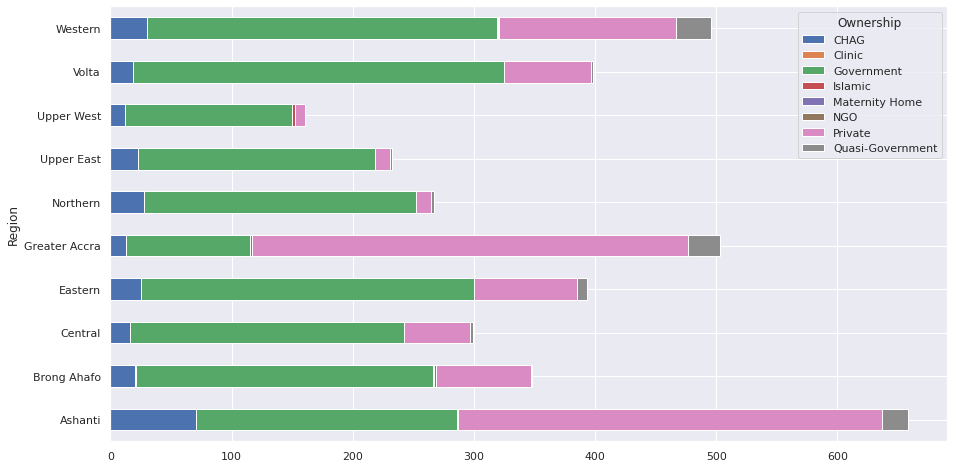

In [29]:
df= region_owner_df.groupby(['Region','Ownership']).sum().unstack('Ownership')
df.columns = df.columns.droplevel()
df.plot(kind='barh', stacked=True, figsize = (15,8))

#### Region-wise distribution of health facilities when Government has the ownership

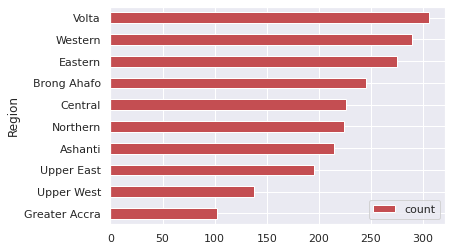

In [30]:
region_owner_df[region_owner_df['Ownership']=='Government'].sort_values(by='count').plot('Region','count',kind='barh',color='C3')

#### Region-wise distribution of health facilities when Private has the ownership

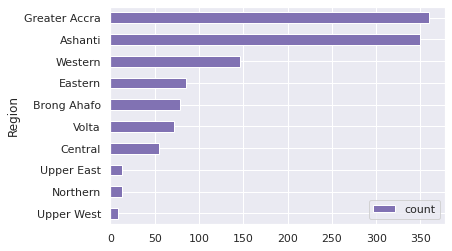

In [31]:
region_owner_df[region_owner_df['Ownership']=='Private'].sort_values(by='count').plot('Region','count',kind='barh',color='C4')

#### Region-wise distribution of health facilities when CHAG has the ownership

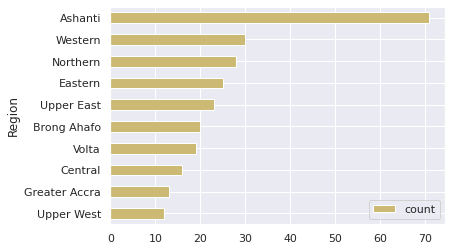

In [32]:
region_owner_df[region_owner_df['Ownership']=='CHAG'].sort_values(by='count').plot('Region','count',kind='barh',color='C8')

#### Health facilities distribution based on Region, Ownership and Type

In [33]:
region_owner_type_df= data.groupby(['Region','Ownership','Type']).size().to_frame('count').reset_index()
region_owner_type_df

,Region,Ownership,Type,count
0,Ashanti,CHAG,Clinic,51
1,Ashanti,CHAG,District Hospital,1
2,Ashanti,CHAG,Health Centre,6
3,Ashanti,CHAG,Hospital,13
4,Ashanti,Government,CHPS,14
5,Ashanti,Government,Clinic,28
6,Ashanti,Government,District Health Directorate,2
7,Ashanti,Government,District Hospital,13
8,Ashanti,Government,Health Centre,127
9,Ashanti,Government,Hospital,9


#### District-wise allocation of health facilities

In [34]:
region_district_df= data.groupby(['Region','District']).size().to_frame('count').reset_index()
region_district_df.sort_values(by='count', ascending=False)

,Region,District,count
91,Greater Accra,Accra Metropolitan,277
17,Ashanti,Kumasi Metropolitan,263
97,Greater Accra,Tema Metropolitan,118
166,Western,Shama Ahanta East,71
138,Volta,Ho Municipal,51
153,Western,Bia,49
143,Volta,Ketu,47
95,Greater Accra,Ga East,44
139,Volta,Hohoe,42
110,Northern,Tamale Metropolitan,41


#### Health facilities density on Ghana map

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


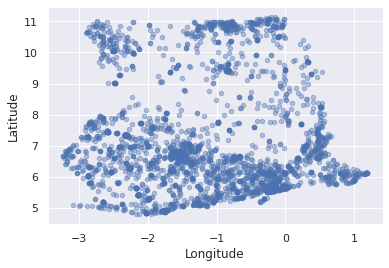

In [35]:
data.plot(kind="scatter", x="Longitude", y ="Latitude", s=20, alpha= 0.4)
plt.show()

From the map above we could notice that most of the health facilities are located in the south belt, followed by the northern belt with fewer facilities in the middle belt

In [36]:
facility= data.groupby(['FacilityName']).size().to_frame('facility_count').reset_index()
facility.sort_values(by='facility_count', ascending =False)[:10]

,FacilityName,facility_count
2757,Rabito Clinic,11
136,Adom Maternity Home,7
2693,Police Clinic,6
2803,SDA Hospital,6
967,Christian Eye Centre,6
2840,Salvation Army Clinic,6
1331,Florence Maternity Home,5
2768,Regional Health Directorate,4
3143,Swan Clinic,4
1303,Fame Clinic,4


#### Town with maximum health facilities

In [37]:
town= data.groupby(['Town','Region']).size().to_frame('town_count').reset_index()
town.sort_values(by='town_count', ascending =False)[:10]

,Town,Region,town_count
2219,Sunyani,Brong Ahafo,29
1342,Koforidua,Eastern,17
645,Berekum,Brong Ahafo,16
1990,Osu,Greater Accra,15
1188,Ho,Volta,15
2279,Techiman,Brong Ahafo,14
144,Adum,Ashanti,13
2285,Tema Community 1,Greater Accra,12
1565,Madina,Greater Accra,11
2435,Winneba,Central,11


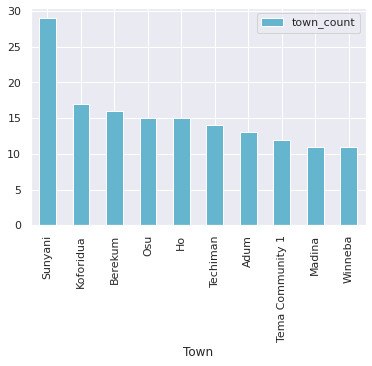

In [38]:
town.sort_values(by='town_count', ascending =False)[:10].plot('Town','town_count',kind='bar',color='C9')

#### Region wise allocation of health facilities

In [39]:
region= data.groupby(['Region']).size().to_frame('region_count').reset_index()
region

,Region,region_count
0,Ashanti,658
1,Brong Ahafo,348
2,Central,299
3,Eastern,393
4,Greater Accra,503
5,Northern,267
6,Upper East,232
7,Upper West,161
8,Volta,398
9,Western,496


In [40]:
fig = go.Figure(data=[go.Pie(labels=region['Region'], values=region['region_count'].values)])
fig.show()

In [41]:
# Most common health facility type in each region
pd.DataFrame(data.groupby(['Region', 'Type']).size().unstack().idxmax(axis = 1))

,0
Region,
Ashanti,Clinic
Brong Ahafo,Clinic
Central,CHPS
Eastern,RCH
Greater Accra,Clinic
Northern,Health Centre
Upper East,CHPS
Upper West,CHPS
Volta,Health Centre


Text(0.5, 1.0, 'Count of each health facility type')

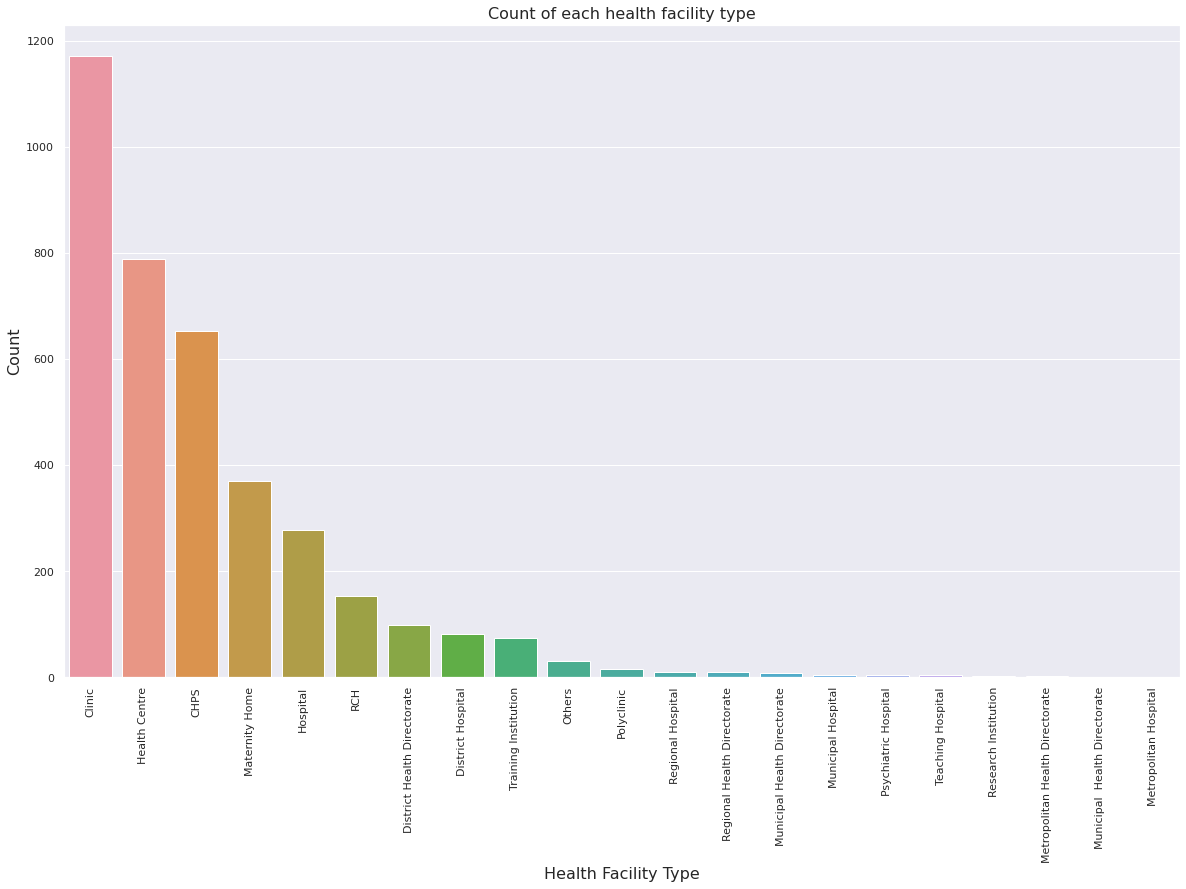

In [42]:
facility_types = data['Type'].value_counts()
plt.figure(figsize = (20, 12))
sns.barplot(x = facility_types.index, y = facility_types.values)
plt.xticks(rotation = 90)
plt.xlabel("Health Facility Type", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of each health facility type", fontsize = 16)


#### CONCLUSIONS

The analysis conducted above gives a clear understanding of Ghana's Health Infrastruture.

    First we point out that the client data is out of date and needs to be updated since the regions in Ghana has been updated to 16 regions from the previuos 10 regions
    
    From the analysis, it is clear that the most common health facilities(5) in Ghana are Clinics, Health Centres, CHPS,Maternity Homes and Hospitals and among them Clinics are the most popular, most of the health facilities in Ghana are state-owned(Government).
    
    The analysis shows that Greater Accra has the highest count of available Clinics with a total of 284 and the Ashanti region comming up at second place with a count of 269 Clinics.
    
    The second most common health facility among the regions is the Health Centre which is greatly dominated by the Volta region of a total count of 201 and the Ashanti having a count of 137.
    
    CHPS is greatly dominated in the Western Region of Ghana (126) and a count of 126 for the Central Region.
    
    Maternity Homes are mostly populated in the Ashanti region with a count of 113. 
    
    Hospitals are less found in the Upper west and East of Ghana with Ashanti Region and Greater Accra having the majority count of hospitals at 105 and 101 respectively.
    
    -----------------------------------------------------------------------------------------------------------
           
    Upper West, Upper East, Northern, Central, Brong Ahafo, Eastern and Volta Region  has the lowest number of Hospitals in the Country, with 6,9,20,21,28,28,28 respectively.
    
    Although Brong Ahafo, Eastern  and Volta Region have 28 Hospitals Brong Ahafo and Eastern Regions have far less CHPS and Health Centers.
    
    

#### RECOMMENDATIONS



Three Facilities should be built in the Upper East Region in the respective districts; Garu - Tempare, Navrongo and Talasi - Nabdam. Reason: Upper East Region has the lowest number of Hospitals in Ghana (6) and among districts where health facilites are, the above list district have no Hospitals.


Three Facilities should be built in the Upper West Region in the respective districts; Wa West, Wa East and Lambussie.Reason: Upper West Region has the second lowest number of Hospitals in Ghana (9) and among districts where health facilites are, the above list district have no Hospitals.

One Facility should be built in Karaga district of the Northern Region. Reason: All other districts in the Region has more than three health facilities with the exception of Karaga.


On the average apart from Upper East, Upper West and the Northern Regions, Brong Ahafo and Eastern Regions have the lowest number of health facilities in Ghana, So it will be good to build one health facility in the Brong Ahafo and Eastern Regions.

Volta Region has a number of CHPS facilities with 28 Hospitals and will be good to locate one the new Hospitals.



In [193]:
pip install Streamlit

     |████████████████████████████████| 7.1 MB 757 kB/s eta 0:00:01
     |████████████████████████████████| 111 kB 738 kB/s eta 0:00:01
     |████████████████████████████████| 727 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 758 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 475 kB/s eta 0:00:01
     |████████████████████████████████| 547 kB 617 kB/s eta 0:00:01


  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13452 sha256=52d065f35755ce692f8154e538c6b657c2b6620bc8adf5e1f69967058021eb57
  Stored in directory: /home/selassie/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
  Created wheel for validators: filename=validators-0.15.0-py3-none-any.whl size=18371 sha256=6ee171549609f8ccb133af3f2f1d5aaf4f575607c9681e64083de718e3825f83
  Stored in directory: /home/selassie/.cache/pip/wheels/ff/a1/08/0650ea8df7821ecd87760d16213b53dd23403927a69a388268
Successfully built blinker validators
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Note: you may need to restart the kernel to use updated packages.
